In [1]:
import pandas as pd
import sqldf
from pandasql import sqldf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("mortgage_final_data.csv")

In [3]:
df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,gdp_dif,gdp_inc,uer_orig,uer_avg,uer_dif,uer_inc,hpi_avg,hpi_dif,hpi_inc,status_time
0,1,48,-7,25,113,29087.21,26.658065,9.200,146.45,2.715903,...,-0.183234,-0.063203,4.7,7.241667,3.6,0.765957,176.657917,59.42,0.682753,1
1,2,26,18,25,138,105654.77,65.469851,7.680,225.10,2.151365,...,-0.747772,-0.257929,4.7,4.700000,0.0,0.000000,225.695000,38.19,0.204323,2
2,3,29,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,...,-1.206168,-0.416044,4.7,4.580000,-0.2,-0.042553,222.164000,127.79,1.426546,2
3,5,27,18,25,138,52100.71,66.346343,9.155,222.39,2.361722,...,-0.537415,-0.185371,4.7,4.600000,-0.3,-0.063830,224.593333,35.48,0.189824,2
4,6,56,19,25,139,190474.11,75.834755,6.580,181.43,1.717053,...,-1.182084,-0.407736,4.7,7.319355,1.9,0.404255,175.143226,-9.99,-0.052189,1


In [4]:
df.drop("id",axis=1,inplace=True)

In [5]:
df

,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,...,gdp_dif,gdp_inc,uer_orig,uer_avg,uer_dif,uer_inc,hpi_avg,hpi_dif,hpi_inc,status_time
0,48,-7,25,113,29087.21,26.658065,9.200,146.45,2.715903,8.3,...,-0.183234,-0.063203,4.7,7.241667,3.6,0.765957,176.657917,59.42,0.682753,1
1,26,18,25,138,105654.77,65.469851,7.680,225.10,2.151365,4.7,...,-0.747772,-0.257929,4.7,4.700000,0.0,0.000000,225.695000,38.19,0.204323,2
2,29,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,4.5,...,-1.206168,-0.416044,4.7,4.580000,-0.2,-0.042553,222.164000,127.79,1.426546,2
3,27,18,25,138,52100.71,66.346343,9.155,222.39,2.361722,4.4,...,-0.537415,-0.185371,4.7,4.600000,-0.3,-0.063830,224.593333,35.48,0.189824,2
4,56,19,25,139,190474.11,75.834755,6.580,181.43,1.717053,6.6,...,-1.182084,-0.407736,4.7,7.319355,1.9,0.404255,175.143226,-9.99,-0.052189,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41724,52,25,52,146,608968.18,110.352418,7.850,161.13,1.081049,8.0,...,0.000000,0.000000,8.0,8.000000,0.0,0.000000,161.130000,-65.16,-0.287949,1
41725,53,26,52,200,146737.39,114.559046,2.000,173.17,0.892996,7.6,...,-0.188053,-0.173954,8.0,7.800000,-0.4,-0.050000,167.150000,-51.93,-0.230697,1
41726,52,26,52,146,78277.84,81.559381,7.720,161.13,1.081049,8.0,...,0.000000,0.000000,8.0,8.000000,0.0,0.000000,161.130000,-63.97,-0.284185,1
41727,53,26,52,146,234815.68,103.820377,2.000,173.17,0.892996,7.6,...,-0.188053,-0.173954,8.0,7.800000,-0.4,-0.050000,167.150000,-51.93,-0.230697,1


In [6]:
df3=sqldf("SELECT AVG(balance_time) as AVGVALUE from df where status_time=1")

In [7]:
df3

,AVGVALUE
0,252566.088154


In [8]:
df2=sqldf("SELECT *, \
          CASE WHEN FICO_orig_time>750 THEN 3 \
          WHEN FICO_orig_time>650 THEN 2 \
          ELSE 1 END AS FICO_group \
          FROM df")

In [9]:
df2

,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,...,gdp_inc,uer_orig,uer_avg,uer_dif,uer_inc,hpi_avg,hpi_dif,hpi_inc,status_time,FICO_group
0,48,-7,25,113,29087.21,26.658065,9.200,146.45,2.715903,8.3,...,-0.063203,4.7,7.241667,3.6,0.765957,176.657917,59.42,0.682753,1,2
1,26,18,25,138,105654.77,65.469851,7.680,225.10,2.151365,4.7,...,-0.257929,4.7,4.700000,0.0,0.000000,225.695000,38.19,0.204323,2,1
2,29,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,4.5,...,-0.416044,4.7,4.580000,-0.2,-0.042553,222.164000,127.79,1.426546,2,2
3,27,18,25,138,52100.71,66.346343,9.155,222.39,2.361722,4.4,...,-0.185371,4.7,4.600000,-0.3,-0.063830,224.593333,35.48,0.189824,2,1
4,56,19,25,139,190474.11,75.834755,6.580,181.43,1.717053,6.6,...,-0.407736,4.7,7.319355,1.9,0.404255,175.143226,-9.99,-0.052189,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41724,52,25,52,146,608968.18,110.352418,7.850,161.13,1.081049,8.0,...,0.000000,8.0,8.000000,0.0,0.000000,161.130000,-65.16,-0.287949,1,1
41725,53,26,52,200,146737.39,114.559046,2.000,173.17,0.892996,7.6,...,-0.173954,8.0,7.800000,-0.4,-0.050000,167.150000,-51.93,-0.230697,1,2
41726,52,26,52,146,78277.84,81.559381,7.720,161.13,1.081049,8.0,...,0.000000,8.0,8.000000,0.0,0.000000,161.130000,-63.97,-0.284185,1,1
41727,53,26,52,146,234815.68,103.820377,2.000,173.17,0.892996,7.6,...,-0.173954,8.0,7.800000,-0.4,-0.050000,167.150000,-51.93,-0.230697,1,2


In [10]:
groups=sqldf("SELECT FICO_group,COUNT(1) as num from df2 group by fico_group")

659.6647894749455

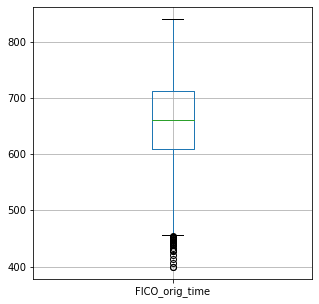

In [11]:
plt.figure(figsize=(5,5))
df.boxplot("FICO_orig_time")
df["FICO_orig_time"].mean()

In [12]:
df3=sqldf("SELECT status_time,COUNT(1) as num from df2 where fico_group=1 group by status_time")
df3

,status_time,num
0,1,7527
1,2,11031


In [13]:
df4=sqldf("SELECT status_time,COUNT(1) as num from df2 where fico_group=2 group by status_time")
df4

,status_time,num
0,1,6612
1,2,11494


In [14]:
df5=sqldf("SELECT status_time,COUNT(1) as num from df2 where fico_group=3 group by status_time")
df5

,status_time,num
0,1,1012
1,2,4053


In [15]:
x1=[0.8,1.8]
x3=[1.2,2.2]
x2=[1,2]
width=0.2
y1=list(df3["num"])
y2=list(df4["num"])
y3=list(df5["num"])

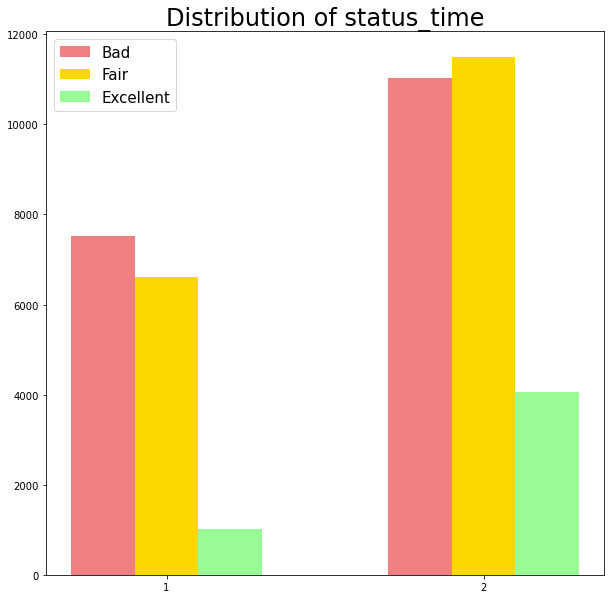

In [16]:
plt.figure(figsize=(10,10))
plt.xticks([1,2])
plt.bar(x1,y1, label="Bad",width=width,color='lightcoral')
plt.bar(x2,y2, label="Fair",width=width,color='gold')
plt.bar(x3,y3, label="Excellent",width=width,color='palegreen')
plt.legend(fontsize=15)
plt.title('Distribution of status_time',fontsize=24)
plt.show()

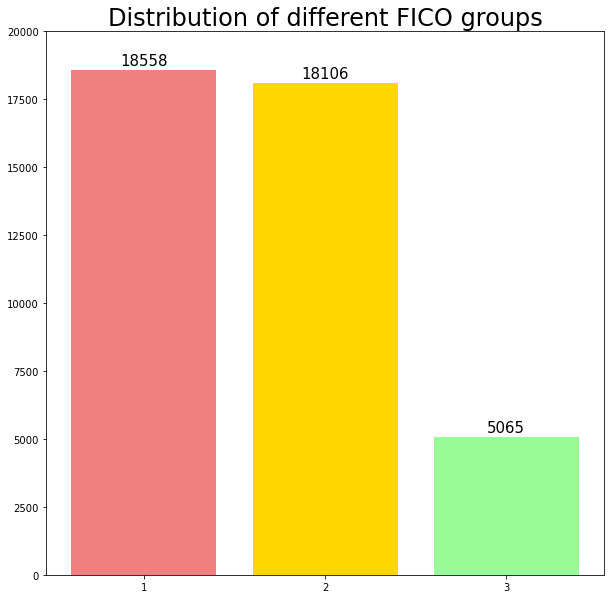

In [17]:
plt.figure(figsize=(10,10))
plt.xticks([1,2,3])
plt.ylim(0,20000)
plt.bar(groups['FICO_group'],groups['num'],color=['lightcoral',"gold","palegreen"])
for a,b in zip(groups['FICO_group'],groups['num']):
     plt.text(a, b+80, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)
plt.title('Distribution of different FICO groups',fontsize=24)
plt.show()
    

In [18]:
df6=sqldf("SELECT AVG(FICO_orig_time) FROM df")

In [19]:
df6

,AVG(FICO_orig_time)
0,659.664789
